In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import nltk
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
#import gensim
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras

# Load the Dataset

In [9]:
data2 = pd.read_csv(r'dataset movie review\training.txt'
                   , sep='\t', header = None, names = ['Sentiment','Text'])
data_test = pd.read_csv(r'dataset movie review\testdata.txt'
                   , sep='\t', header = None, names = ['Text'])

# Shuffling dataset

In [10]:
#Shuffling the dataset because the dataset contains all negative sentiments first then positive sentiments
data2 = data2.sample(frac =1)
data2.reset_index(drop = True, inplace = True)

# Converting to lower case

In [11]:
data2['Text'] = data2['Text'].apply(lambda x: x.lower())  # Converting to lower case
#data_test['Text'] = data_test['Text'].apply(lambda x: x.lower())

# Punctuation removal

In [12]:
def remove_punch(ser): # Punctuation removal
    ser = re.sub('[^\w\s]','',ser)
    return ser
    
data2['Text'] = data2['Text'].apply(remove_punch)
#data_test['Text'] = data_test['Text'].apply(remove_punch)

# Stopwords removal

In [13]:
all_stopwords = stopwords.words('english')
def remove_stopwords(ser): #remove stopwords
    ring = []
    for x in ser.split():
        if x not in all_stopwords:
            ring.append(x)
    ser = ' '.join(ring)
    return ser

data2['Text'] = data2['Text'].apply(remove_stopwords)
#data_test['Text'] = data_test['Text'].apply(remove_stopwords)

# Correcting spelling mistakes, if any

In [14]:
data2['Text'] = data2['Text'].apply(lambda x: str(TextBlob(x).correct())) # correct spelling mistakes
#data_test['Text'] = data_test['Text'].apply(lambda x: str(TextBlob(x).correct()))

# Stemming the data

In [15]:
# stemming
st = PorterStemmer()
data2['Text'] = data2['Text'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))
#data_test['Text'] = data_test['Text'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

# Building wordcloud

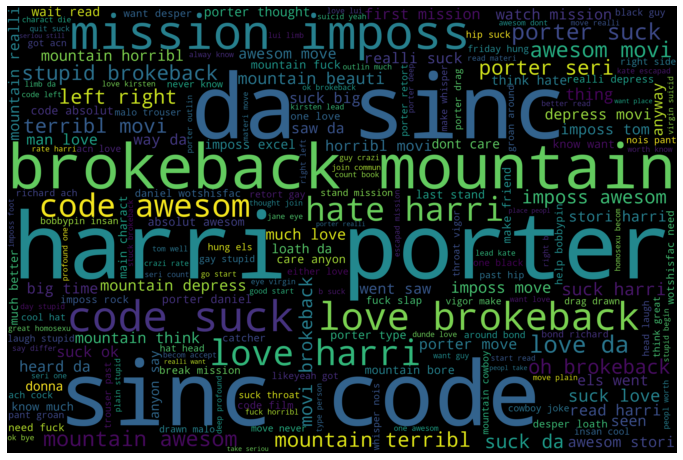

In [16]:
# building word cloud
words = data2['Text'].apply(lambda x: x.split())
words_all = []
for word in words:
    words_all.extend(word)
    
word_cloud = WordCloud(height= 2000, width = 3000).generate(' '.join(words_all))
plt.figure(figsize=(12,10))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Tokenizing the dataset

In [17]:
tokenized_data2 = data2['Text'].apply(lambda x: nltk.word_tokenize(x))
#tokenized_data_test = data_test['Text'].apply(lambda x: nltk.word_tokenize(x))


In [18]:
# 
word2vec_model = Word2Vec(tokenized_data2, min_count = 1, vector_size = 50)
w2v_model = word2vec_model.wv

# Converting each word into a vector

In [19]:
# assigning vector to each word in a sentence
def assigner(data, w2v_model):
    for i in range(len(data)):
        for k in range(len(data.iloc[i])):
            if data.iloc[i][k] not in w2v_model:
                data.iloc[i][k] = np.zeros(50)
            else:
                s = w2v_model[data.iloc[i][k]]
                data.iloc[i][k] = s

    return data

data3 = assigner(data = tokenized_data2, w2v_model = w2v_model)
#data_test3 = assigner(data = tokenized_data_test, w2v_model = w2v_model)



# Calculating vector for each sentence

In [20]:
# mean vector for sentence from words
def mean_vector(data):
    data_new = np.zeros(shape = (6918,50))
    for i in range(len(data)):
        m= data.iloc[i]
        mm = np.asarray(m)
        meann = mm.mean(axis=0)
        for l in range(len(meann)):
            data_new[i][l] = meann[l]
        
        #data.iloc[i] = meann
    return data_new

data4 = mean_vector(data = data3)
#data_test4 = mean_vector(data = data_test3)

# Scaling vectors

In [ ]:
# scaling vectors - hold on for the time being
#scaler = StandardScaler()
#data5 = scaler.fit_transform(data4)

# Train test split

In [21]:
# splitting data into test and train and val
x = data4
y = np.array(data2['Sentiment'])
#y = keras.utils.np_utils.to_categorical(y)
y_sized = y[:,np.newaxis]
x_train, X_test, y_train, Y_test = train_test_split(x, y_sized, test_size = 0.4)
x_val, x_test, y_val, y_test = train_test_split(X_test, Y_test, test_size = 0.5) 

# Model Training

In [22]:
# model setup
model_nn = Sequential()
model_nn.add(Dense(16, activation = 'relu', input_dim = 50))
model_nn.add(Dense(16, activation = 'relu'))
model_nn.add(Dense(1, activation = 'sigmoid'))
model_nn.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy', metrics = ['accuracy'])
model_nn.fit(x_train, y_train, epochs = 10, batch_size = 32)
model_nn.summary()


Epoch 1/10
130/130 [==============================] - 2s 3ms/step - loss: 0.5937 - accuracy: 0.7084
Epoch 2/10
130/130 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.9024
Epoch 3/10
130/130 [==============================] - 0s 3ms/step - loss: 0.2627 - accuracy: 0.9480
Epoch 4/10
130/130 [==============================] - 0s 3ms/step - loss: 0.1657 - accuracy: 0.9530
Epoch 5/10
130/130 [==============================] - 0s 3ms/step - loss: 0.1256 - accuracy: 0.9586
Epoch 6/10
130/130 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9564
Epoch 7/10
130/130 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9607
Epoch 8/10
130/130 [==============================] - 0s 2ms/step - loss: 0.0915 - accuracy: 0.9641
Epoch 9/10
130/130 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9639
Epoch 10/10
130/130 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9619

In [23]:
score = model_nn.evaluate(x_val, y_val, batch_size = 128, verbose = 2)
print(score[1])

11/11 - 0s - loss: 0.0860 - accuracy: 0.9617 - 364ms/epoch - 33ms/step
0.961705207824707
